#Gray 2 RGB without dense

##loading data from kaggle

In [1]:
!kaggle datasets download -d lara311/flowers-five-classes

Dataset URL: https://www.kaggle.com/datasets/lara311/flowers-five-classes
License(s): apache-2.0
 91% 144M/158M [00:01<00:00, 113MB/s]
100% 158M/158M [00:01<00:00, 125MB/s]


In [2]:
!unzip -qq flowers-five-classes.zip -d flowers-five-classes1

In [4]:
list_paths = []
for folder in os.listdir('/content/flowers-five-classes1/train'):
  for file in os.listdir('/content/flowers-five-classes1/train/'+folder):
    list_paths.append('/content/flowers-five-classes1/train/'+folder+'/'+file)

print(list_paths)

['/content/flowers-five-classes1/train/dandelion/17280886635_e384d91300_n.jpg', '/content/flowers-five-classes1/train/dandelion/8979062599_86cac547b8.jpg', '/content/flowers-five-classes1/train/dandelion/17457028309_95514c8d02_n.jpg', '/content/flowers-five-classes1/train/dandelion/17020815734_81e8db8008_m.jpg', '/content/flowers-five-classes1/train/dandelion/18271576032_d7e2296de4_n.jpg', '/content/flowers-five-classes1/train/dandelion/3998927705_af499a4f29.jpg', '/content/flowers-five-classes1/train/dandelion/4558562689_c8e2ab9f10.jpg', '/content/flowers-five-classes1/train/dandelion/4606893762_c2f26c7e91_n.jpg', '/content/flowers-five-classes1/train/dandelion/5629940298_634f35125c.jpg', '/content/flowers-five-classes1/train/dandelion/14084345111_8a4cb05a31.jpg', '/content/flowers-five-classes1/train/dandelion/3584415133_a4122ab7b9.jpg', '/content/flowers-five-classes1/train/dandelion/4684022752_89631bd98e_n.jpg', '/content/flowers-five-classes1/train/dandelion/3562861685_8b8d747b4d.

##libraries

In [68]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import Reshape, Conv2DTranspose, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split

##read data

In [69]:
array_list_gray = []
array_list_rgb = []
for i in list_paths:
  img = cv2.imread(i)
  img = cv2.resize(img, (152, 152))
  array_list_rgb.append(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = np.reshape(img, (152, 152 ,1))

  array_list_gray.append(img)
array_list_gray = np.array(array_list_gray)
array_list_rgb = np.array(array_list_rgb)

In [50]:
array_list_gray.shape


(2746, 152, 152, 1)

In [70]:
#Normalization data
array_list_gray = array_list_gray.astype('float32') / 255
array_list_rgb = array_list_rgb.astype('float32') / 255


In [71]:
#spliting data
X_train, X_test, Y_train, Y_test = train_test_split(array_list_gray, array_list_rgb, test_size=0.2, random_state=42)

##building Autoencoder model

In [72]:
input_shape = (152, 152, 1)
kernel_size = 3

In [54]:
#encoding
inputs = Input(shape=input_shape)
x = inputs

x = Conv2D(64, (kernel_size, kernel_size), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (kernel_size, kernel_size), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (kernel_size, kernel_size), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
h = MaxPooling2D((2, 2), padding='same')(x)

In [55]:
#decoding
x = Conv2DTranspose(256, (kernel_size, kernel_size), strides=(2, 2), padding='same', activation='relu')(h)
x = BatchNormalization()(x)

x = Conv2DTranspose(128, (kernel_size, kernel_size), strides=(2, 2), padding='same', activation='relu')(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(64, (kernel_size, kernel_size), strides=(2, 2), padding='same', activation='relu')(x)
x = BatchNormalization()(x)

outputs = Conv2DTranspose(3, (kernel_size, kernel_size), strides=(1, 1), padding='same', activation='sigmoid')(x)

decoder = Model(inputs, outputs)


In [56]:
decoder.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 152, 152, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 152, 152, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 152, 152, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 76, 76, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 76, 76, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 76, 76, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 38, 38, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 38, 38, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 38, 38, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 19, 19, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_20                  │ (None, 38, 38, 256)         │         590,080 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 38, 38, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_21                  │ (None, 76, 76, 128)         │         295,040 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 76, 76, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_22                  │ (None, 152, 152, 64)        │          73,792 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 152, 152, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_23                  │ (None, 152, 152, 3)         │           1,7

 Total params: 1,333,891 (5.09 MB)

 Trainable params: 1,332,099 (5.08 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [57]:
decoder.compile(loss='mse', optimizer='adam')

##training

In [58]:
decoder.fit(X_train, Y_train,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=(X_test, Y_test))

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - loss: 0.0602 - val_loss: 0.0744
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 297ms/step - loss: 0.0277 - val_loss: 0.0763
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 315ms/step - loss: 0.0255 - val_loss: 0.0762
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 300ms/step - loss: 0.0245 - val_loss: 0.0730
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 314ms/step - loss: 0.0248 - val_loss: 0.0703
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 315ms/step - loss: 0.0241 - val_loss: 0.0668
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 301ms/step - loss: 0.0238 - val_loss: 0.0676
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 302ms/step - loss: 0.0228 - val_loss: 0.0567
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 301ms/step - loss: 0.0224 - val_loss: 0.0543
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 315ms/step - loss: 0.0222 - val_loss: 0.0475
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 302ms/step - loss: 0.0222 - val_loss: 0.0462
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 3

##result

In [59]:
#predict on test data
x_decoded = decoder.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 224ms/step


In [61]:
x_decoded = (x_decoded * 255).astype(np.uint8)

<ipython-input-63-44f484f0fd88>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2,4,1)


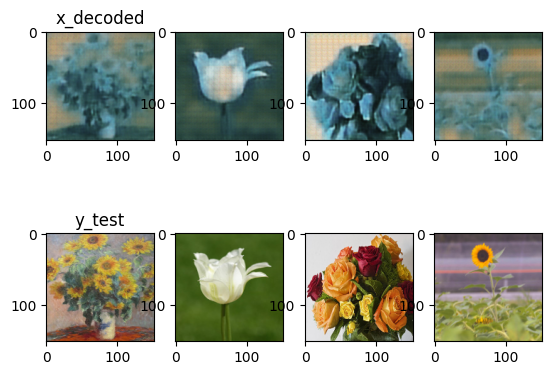

In [63]:
plt.figure()
plt.title("x_decode")
ax1 = plt.subplot(2,4,1)
ax1.title.set_text('x_decoded')
plt.imshow(x_decoded[0], cmap='gray')
plt.subplot(2,4,2)
plt.imshow(x_decoded[1], cmap='gray')
plt.subplot(2,4,3)
plt.imshow(x_decoded[2], cmap='gray')
plt.subplot(2,4,4)
plt.imshow(x_decoded[3], cmap='gray')
ax2 = plt.subplot(2,4,5)
ax2.title.set_text('y_test')
plt.imshow(cv2.cvtColor(Y_test[0], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,6)
plt.imshow(cv2.cvtColor(Y_test[1], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,7)
plt.imshow(cv2.cvtColor(Y_test[2], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,8)
plt.imshow(cv2.cvtColor(Y_test[3], cv2.COLOR_BGR2RGB))

In [64]:
#predict on train data
x_decoded2 = decoder.predict(X_train)

69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step


In [65]:
x_decoded2 = (x_decoded2 * 255).astype(np.uint8)

<ipython-input-66-7aacb4acd8b0>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2,4,1)


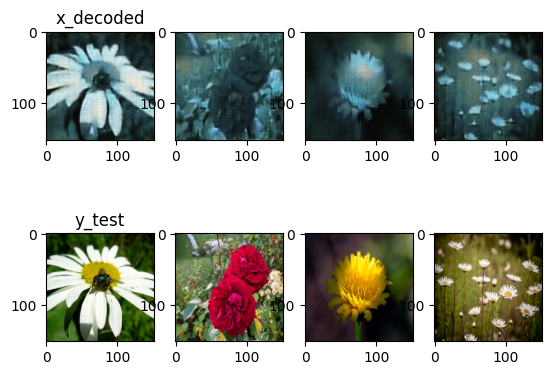

In [66]:
plt.figure()
plt.title("x_decode")
ax1 = plt.subplot(2,4,1)
ax1.title.set_text('x_decoded')
plt.imshow(x_decoded2[0], cmap='gray')
plt.subplot(2,4,2)
plt.imshow(x_decoded2[1], cmap='gray')
plt.subplot(2,4,3)
plt.imshow(x_decoded2[2], cmap='gray')
plt.subplot(2,4,4)
plt.imshow(x_decoded2[3], cmap='gray')
ax2 = plt.subplot(2,4,5)
ax2.title.set_text('y_test')
plt.imshow(cv2.cvtColor(Y_train[0], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,6)
plt.imshow(cv2.cvtColor(Y_train[1], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,7)
plt.imshow(cv2.cvtColor(Y_train[2], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,8)
plt.imshow(cv2.cvtColor(Y_train[3], cv2.COLOR_BGR2RGB))